In [15]:
# from td_utils import load_raw_audio
from mix_audio import create_training_data
from utils import make_dir

import os
import numpy as np
from tqdm import tqdm
import IPython
import matplotlib.pyplot as plt

from pydub import AudioSegment

In [16]:
version = 'test' # 데이터 만들때마다 바꾸기

In [17]:
make_dir('./data/{}_audios'.format(version))
make_dir('./data/XY_{}'.format(version))

In [18]:
def load_raw_audio(audio_dir):
    # print(audio_dir)
    activates = []
    backgrounds = []
    negatives = []
    # print(os.listdir(audio_dir))
    for filename in os.listdir(os.path.join(audio_dir,'activate')):
        if filename.endswith("wav"):
            activate = AudioSegment.from_wav(os.path.join(audio_dir,'activate',filename))
            activates.append(activate)
    for filename in os.listdir(os.path.join(audio_dir,'background')):
        if filename.endswith("wav"):
            background = AudioSegment.from_wav(os.path.join(audio_dir,'background',filename))
            backgrounds.append(background)
    for filename in os.listdir(os.path.join(audio_dir,'negative')):
        if filename.endswith("wav"):
            negative = AudioSegment.from_wav(os.path.join(audio_dir,'negative',filename))
            negatives.append(negative)
    return activates, negatives, backgrounds

In [19]:
if version == 'train':
    audio_dir = os.path.join('.', 'data', 'audio_label_clip')
else:
    audio_dir = os.path.join('.', 'data', 'audio_label_clip_for_test')

activates, negatives, backgrounds = load_raw_audio(audio_dir)
print(backgrounds)
num_of_data = 1000

if len(backgrounds) == 0:
    print("background가 없습니다.")
else:
    for i in tqdm(range(num_of_data)):
        try:
            j = np.random.randint(0, len(backgrounds))
            background = backgrounds[j]
            x,x_minus, y = create_training_data(background, 
                                        activates, 
                                        negatives, 
                                        filename='./data/{}_audios/mix_{}.wav'.format(version, i))
            x = np.transpose(x)
            y = np.transpose(y)
            np.save('./data/XY_{}/x_{}'.format(version, i), x)
            np.save('./data/XY_{}/y_{}'.format(version, i), y)
        except Exception as e:
            pass


[<pydub.audio_segment.AudioSegment object at 0x000001DD00579708>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579808>, <pydub.audio_segment.AudioSegment object at 0x000001DD005798C8>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579908>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579948>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579788>, <pydub.audio_segment.AudioSegment object at 0x000001DD005799C8>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579A08>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579A48>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579988>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579848>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579AC8>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579B08>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579B48>, <pydub.audio_segment.AudioSegment object at 0x000001DD00579B88>, <pydub.audio_segment.Aud

100%|██████████| 1000/1000 [02:33<00:00,  6.50it/s]


In [20]:
print(x.shape, y.shape)

(862, 128) (212, 1)


In [21]:
IPython.display.Audio("./data/{}_audios/mix_{}.wav".format(version, num_of_data-1))

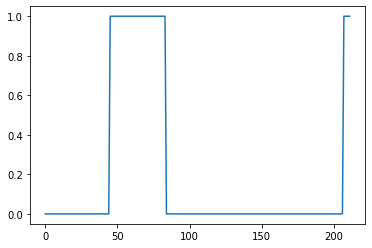

In [22]:
plt.plot(np.load('./data/XY_{}/y_{}.npy'.format(version, num_of_data-1)))